Import the libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
!pip install jupyter_dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10.4/10.4 MB 63.6 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 233.6/233.6 kB 22.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.6/1.6 MB 50.4 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.0.0
    Uninstalling Werkzeug-3.0.0:
      Successfully uninstalled Werkzeug-3.0.0


<ipython-input-1-e40371fe284b>:5: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
<ipython-input-1-e40371fe284b>:6: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc


In [2]:
import dash

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Plotly-dash/amazon.csv')

In [5]:
df.head()

product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ‚Çπ399   
1  Computers&Accessories|Accessories&Peripherals|...             ‚Çπ199   
2  Computers&Accessories|Accessories&Peripherals|...             ‚Çπ199   
3  Computers&Accessories|Accessories&Peripherals|...             ‚Çπ329   
4  Computers&Accessories|Accessories&Peripherals|...             ‚Çπ154   

  actual_price discount_percentage rating rating_count  \
0       ‚Çπ1,099                 64%    4.2       24,269   
1         ‚Çπ349                 43%    4.0       43,994   
2       ‚Çπ1,899                 90%    3.9        7,928   
3         ‚Çπ699                 53%    4.2       94,363   
4         ‚Çπ399                 61%    4.2       16,905   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  „Äê Fast Charger& Data Sync„Äë-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3  Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4  rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2  R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
3  R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...   
4  R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   
3  https://m.media-amazon.com/images/I/41V5FtEWPk...   
4  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
1  https://www.amazon.in/Ambrane-Unbreakable-Char...  
2  https://www.amazon.in/Sounce-iPhone-Charging-C...  
3  https://www.amazon.in/Deuce-300-Resistant-Tang...  
4  https://www.amazon.in/Portronics-Konnect-POR-1...

CLEANING AND EXPLORING THE DATA SET

In [6]:
df.shape

(1465, 16)

In [7]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [8]:
df.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

In [9]:
#Remove money symbol
for col in df.columns:

    if df[col].dtype == 'object' and '‚Çπ' in df[col].iloc[0]:

        df[col] = df[col].str.replace('‚Çπ', '')

In [10]:
#Remove commas in discounted_price column
for i in df['discounted_price']:
  df['discounted_price'] = df['discounted_price'].str.replace(',','')

In [11]:
#remove commas in actual_price column
for i in df['actual_price']:
  df['actual_price'] = df['actual_price'].str.replace(',','')

In [12]:
#remove percentage in discount_percentage in column
for i in df['discount_percentage']:
  df['discount_percentage'] = df['discount_percentage'].str.replace('%','')

In [13]:
#emove commas in rating_count column
for i in df['rating_count']:
  df['rating_count'] = df['rating_count'].str.replace(',','')

In [14]:
#Check if any entry has the sign '|'
df.loc[df['rating']== '|']

product_id                                       product_name  \
1279  B08L12N5H1  Eureka Forbes car Vac 100 Watts Powerful Sucti...   

                                               category discounted_price  \
1279  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...             2099   

     actual_price discount_percentage rating rating_count  \
1279         2499                  16      |          992   

                                          about_product  \
1279  No Installation is provided for this product|1...   

                                                user_id  \
1279  AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...   

                                              user_name  \
1279  Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...   

                                              review_id  \
1279  R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...   

                                           review_title  \
1279  Decent product,doesn't pick up sand,Ok ok,Must...   

                                         review_content  \
1279  Does the job well,doesn't work on sand. though...   

                                               img_link  \
1279  https://m.media-amazon.com/images/W/WEBP_40237...   

                                           product_link  
1279  https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...

In [15]:
#Replace '|' in rating column
df['rating']=df['rating'].replace('|',np. nan)

In [16]:
#Doble-check if it was replaced
df.loc[df['rating']== '|']

Empty DataFrame
Columns: [product_id, product_name, category, discounted_price, actual_price, discount_percentage, rating, rating_count, about_product, user_id, user_name, review_id, review_title, review_content, img_link, product_link]
Index: []

In [17]:
#Cast type columns to float
df = df.astype({'discounted_price':'float','actual_price':'float','rating':'float','rating_count':'float','discount_percentage':'int'})

In [18]:
#Check how category column is composed of
df['category'].unique()

array(['Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables',
       'Computers&Accessories|NetworkingDevices|NetworkAdapters|WirelessUSBAdapters',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables',
       'Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions',
       'Electronics|HomeTheater,TV&Video|Accessories|RemoteControls',
       'Electronics|HomeTheater,TV&Video|Televisions|StandardTelevisions',
       'Electronics|HomeTheater,TV&Video|Accessories|TVMounts,Stands&Turntables|TVWall&CeilingMounts',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|RCACables',
       'Electronics|HomeAudio|Accessories|SpeakerAccessories|Mounts',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|OpticalCables',
       'Electronics|HomeTheater,TV&Video|Projectors',
       'Electronics|HomeAudio|Accessories|Adapters',
       'Electronics|HomeTheater,TV&Video|SatelliteEquipment|SatelliteReceivers',
       'Computers&Acces

In [19]:
#Divide category column in several columns, separation is made using '|' symbol
df2=df['category'].str.split('|',expand=True).fillna('null')
df2=df2.rename(columns={0:'main_category',1:'subcategory_1',2:'subcategory_2',3:'subcategory_3',4:'subcategory_4',5:'subcategory_5',6:'subcategory_6'})
df2

main_category               subcategory_1  \
0     Computers&Accessories     Accessories&Peripherals   
1     Computers&Accessories     Accessories&Peripherals   
2     Computers&Accessories     Accessories&Peripherals   
3     Computers&Accessories     Accessories&Peripherals   
4     Computers&Accessories     Accessories&Peripherals   
...                     ...                         ...   
1460           Home&Kitchen      Kitchen&HomeAppliances   
1461           Home&Kitchen      Kitchen&HomeAppliances   
1462           Home&Kitchen  Heating,Cooling&AirQuality   
1463           Home&Kitchen  Heating,Cooling&AirQuality   
1464           Home&Kitchen      Kitchen&HomeAppliances   

                   subcategory_2             subcategory_3 subcategory_4  \
0             Cables&Accessories                    Cables     USBCables   
1             Cables&Accessories                    Cables     USBCables   
2             Cables&Accessories                    Cables     USBCables   
3             Cables&Accessories                    Cables     USBCables   
4             Cables&Accessories                    Cables     USBCables   
...                          ...                       ...           ...   
1460  WaterPurifiers&Accessories  WaterPurifierAccessories          null   
1461      SmallKitchenAppliances         Rice&PastaCookers          null   
1462                 RoomHeaters            HeatConvectors          null   
1463                        Fans               ExhaustFans          null   
1464      SmallKitchenAppliances            SandwichMakers          null   

     subcategory_5 subcategory_6  
0             null          null  
1             null          null  
2             null          null  
3             null          null  
4             null          null  
...            ...           ...  
1460          null          null  
1461          null          null  
1462          null          null  
1463          null          null  
1464          null          null  

[1465 rows x 7 columns]

In [20]:
#Remove subcategories_5 and 6 which are mostly null
df2=df2.drop(['subcategory_5','subcategory_6'], axis=1)

In [21]:
#Join both data frames, original and categories
df=pd.concat([df,df2],axis=1)

In [22]:
#Check if the data frame was correctly joined
df.head()

product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             399.0   
1  Computers&Accessories|Accessories&Peripherals|...             199.0   
2  Computers&Accessories|Accessories&Peripherals|...             199.0   
3  Computers&Accessories|Accessories&Peripherals|...             329.0   
4  Computers&Accessories|Accessories&Peripherals|...             154.0   

   actual_price  discount_percentage  rating  rating_count  \
0        1099.0                   64     4.2       24269.0   
1         349.0                   43     4.0       43994.0   
2        1899.0                   90     3.9        7928.0   
3         699.0                   53     4.2       94363.0   
4         399.0                   61     4.2       16905.0   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  „Äê Fast Charger& Data Sync„Äë-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                             user_id  ...  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...  ...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...  ...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...  ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...  ...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...  ...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2  R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
3  R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...   
4  R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   
3  https://m.media-amazon.com/images/I/41V5FtEWPk...   
4  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link          main_category  \
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  Computers&Accessories   
1  https://www.amazon.in/Ambrane-Unbreakable-Char...  Computers&Accessories   
2  https://www.amazon.in/Sounce-iPhone-Charging-C...  Computers&Accessories   
3  https://www.amazon.in/Deuce-300-Resistant-Tang...  Computers&Accessories   
4  https://www.amazon.in/Portronics-Konnect-POR-1...  Computers&Accessories   

             subcategory_1       subcategory_2 subcategory_3 subcategory_4  
0  Accessories&Peripherals  Cables&Accessories        Cables     USBCables  
1  Accessories&Peripherals  Cables&Accessories        Cables     USBCables  
2  Accessories

What are the most representative categories?

In [23]:
#Check the distribution of each category
px.strip(df, x='actual_price', color='main_category', hover_name='product_name')

How is the rating in those categories?

In [24]:
#Group by main category, calculate mean of rating and count products in each category
df_rating=df.groupby('main_category').agg({'rating':('mean'),'product_name':('count')}).round(2).reset_index()

In [25]:
#Rename column product_name to total
df_rating.rename(columns={'product_name':'total'}, inplace= True)

In [26]:
#Looking for the most relevant categories, sorting by total of products in descending order
df_rating.sort_values(by='total', ascending= False, inplace=True)
df_rating

main_category  rating  total
2            Electronics    4.08    526
1  Computers&Accessories    4.15    453
4           Home&Kitchen    4.04    448
7         OfficeProducts    4.31     31
5        HomeImprovement    4.25      2
6     MusicalInstruments    3.90      2
0          Car&Motorbike    3.80      1
3    Health&PersonalCare    4.00      1
8             Toys&Games    4.30      1

In [27]:
#Create a new data frame for only electronics category
df_electronics = df.loc[df['main_category']=='Electronics']

In [28]:
#Check the new data frame
df_electronics.head(5)

product_id                                       product_name  \
12  B07KSMBL2H  AmazonBasics Flexible Premium HDMI Cable (Blac...   
16  B0B6F7LX4C  MI 80 cm (32 inches) 5A Series HD Ready Smart ...   
19  B08DPLCM6T  LG 80 cm (32 inches) HD Ready Smart LED TV 32L...   
21  B085194JFL  tizum HDMI to VGA Adapter Cable 1080P for Proj...   
22  B09F6S8BT6  Samsung 80 cm (32 Inches) Wondertainment Serie...   

                                             category  discounted_price  \
12  Electronics|HomeTheater,TV&Video|Accessories|C...             219.0   
16  Electronics|HomeTheater,TV&Video|Televisions|S...           13999.0   
19  Electronics|HomeTheater,TV&Video|Televisions|S...           13490.0   
21  Electronics|HomeTheater,TV&Video|Accessories|C...             279.0   
22  Electronics|HomeTheater,TV&Video|Televisions|S...           13490.0   

    actual_price  discount_percentage  rating  rating_count  \
12         700.0                   69     4.4      426973.0   
16       24999.0                   44     4.2       32840.0   
19       21990.0                   39     4.3       11976.0   
21         499.0                   44     3.7       10962.0   
22       22900.0                   41     4.3       16299.0   

                                        about_product  \
12  Flexible, lightweight HDMI cable for connectin...   
16  Note : The brands, Mi and Xiaomi, are part of ...   
19  Resolution: HD Ready (1366x768) | Refresh Rate...   
21  Superior Stability: Built-in advanced Certifie...   
22  Resolution: HD Ready (1366x768) | Refresh Rate...   

                                              user_id  ...  \
12  AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...  ...   
16  AHEVOQADJSSRX7DS325HSFLMP7VQ,AG7XYZRCSKX6G2OLO...  ...   
19  AHBNKB74LGTYUOKPAJBSKNFV45CA,AFIECTV45ADX5YPTE...  ...   
21  AEO5FHWNOSFBT554DKQAG4ICBGFQ,AGIQ5Y7Q4MKZ542KK...  ...   
22  AHEVO4Q5NM4YXMG2HDDXC5XMBGRQ,AFZPH7ZAWX5VDY3HO...  ...   

                                            review_id  \
12  R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...   
16  R13UTIA6KOF6QV,R2UGDZSGFF01K7,RHHIZ45VYU5X6,R1...   
19  R2PNR69G0BQG2F,R31A0WWDEYMKEW,R2C4XEWFLVU7JV,R...   
21  R1GYK05NN6747O,R1J21BZ29NGQF9,R16JCHEILBYOMW,R...   
22  R1SN0D4DFBKAZI,R1SX5L77L2CD6V,R1NAZ6M4QBUJMK,R...   

                                         review_title  \
12  It's quite good and value for money,Works well...   
16  It is the best tv if you are getting it in 10-...   
19  Sound quality,Very nice,Value for money,Good,G...   
21  Good product ; Average Finishing,Save it purpo...   
22  Good,Sound is very low another brand comparing...   

                                       review_content  \
12  I am using it for 14 days now. The experience ...   
16  Pros- xiomi 5a is best in budget-Nice picture ...   
19  LG was always Good , correct delivery, good se...   
21  This connector has provided as a boon for my o...   
22  Overall good.,TV picture ok smart betterSound ...   

                                             img_link  \
12  https://m.media-amazon.com/images/I/41nPYaWA+M...   
16  https://m.media-amazon.com/images/I/51fmHk3km+...   
19  https://m.media-amazon.com/images/W/WEBP_40237...   
21  https://m.media-amazon.com/images/W/WEBP_40237...   
22  https://m.media-amazon.com/images/W/WEBP_40237...   

                                         product_link main_category  \
12  https://www.amazon.in/AmazonBasics-Flexible-HD...   Electronics   
16  https://www.amazon.in/MI-inches-Ready-Android-...   Electronics   
19  https://www.amazon.in/LG-inches-Ready-Smart-32...   Electronics   
21  https://www.amazon.in/Adapter-Projector-Comput...   Electronics   
22  https://www.amazon.in/Samsung-Inches-Wondertai...   Electronics   

           subcategory_1 subcategory_2     subcategory_3 subcategory_4  
12  HomeTheater,TV&Video   Accessories            Cables    HDMICables  
16  HomeTheater,TV&Video   Televisions  SmartTelevisions          null  
19  HomeTheater,TV&Video 

In [29]:
#Create a histogram of electronics
fig= px.histogram(df_electronics, x='rating', title='Rating in Electronics')
fig.show()

In [30]:
#Create a histogram of Home and Kitchen
df_home = df.loc[df['main_category']=='Home&Kitchen']
fig = px.histogram(df_home, x='rating', title='Rating in Home & Kitchen')
fig.show()

In [31]:
#Create a histogram of Computers and accessories
df_accessories = df.loc[df['main_category']=='Computers&Accessories']
fig = px.histogram(df_accessories, x='rating', title='Rating in Computers & Accessories')
fig.show()

In [32]:
#Join dataframes of electronics, home and kitchen, and computers
df_mix= pd.concat([df_accessories, df_home, df_electronics])
df_mix

product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1012  B014SZPBM4           Duracell Ultra Alkaline D Battery, 2 Pcs   
1015  B078W65FJ7  boAt BassHeads 900 On-Ear Wired Headphones wit...   
1016  B08S74GTBT  Zebronics Astra 10 Portable Wireless BT v5.0 S...   
1017  B0B9BD2YL4  KINGONE Wireless Charging Pencil (2nd Generati...   
1021  B07W7Z6DVL  Infinity (JBL Fuze 100, Wireless Portable Blue...   

                                               category  discounted_price  \
0     Computers&Accessories|Accessories&Peripherals|...             399.0   
1     Computers&Accessories|Accessories&Peripherals|...             199.0   
2     Computers&Accessories|Accessories&Peripherals|...             199.0   
3     Computers&Accessories|Accessories&Peripherals|...             329.0   
4     Computers&Accessories|Accessories&Peripherals|...             154.0   
...                                                 ...               ...   
1012  Electronics|GeneralPurposeBatteries&BatteryCha...             380.0   
1015  Electronics|Headphones,Earbuds&Accessories|Hea...             849.0   
1016     Electronics|HomeAudio|Speakers|OutdoorSpeakers             799.0   
1017  Electronics|Mobiles&Accessories|MobileAccessor...            2599.0   
1021     Electronics|HomeAudio|Speakers|OutdoorSpeakers            1499.0   

      actual_price  discount_percentage  rating  rating_count  \
0           1099.0                   64     4.2       24269.0   
1            349.0                   43     4.0       43994.0   
2           1899.0                   90     3.9        7928.0   
3            699.0                   53     4.2       94363.0   
4            399.0                   61     4.2       16905.0   
...            ...                  ...     ...           ...   
1012         400.0                    5     4.4        2111.0   
1015        2490.0                   66     4.2       91188.0   
1016        1999.0                   60     3.7         418.0   
1017        6999.0                   63     4.5        1526.0   
1021        2999.0                   50     4.1       25262.0   

                                          about_product  \
0     High Compatibility : Compatible With iPhone 12...   
1     Compatible with all Type C enabled devices, be...   
2     „Äê Fast Charger& Data Sync„Äë-With built-in safet...   
3     The boAt Deuce USB 300 2 in 1 cable is compati...   
4     [CHARGE & SYNC FUNCTION]- This cable comes wit...   
...                                                 ...   
1012  Long Lasting Power Guaranteed|Our best battery...   
1015  Enjoy powerful, dynamic sound with punchy bass...   
1016  Wireless Portable Speaker with Mobile Holder|E...   
1017  „Äê2022 latest iPad Magnetic Charging„Äë The lates...   
1021  Compact Portable Bluetooth Speakers. Wireless ...   

                                                user_id  ...  \
0     AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...  ...   
1     AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...  ...   
2     AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...  ...   
3     AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...  ...   
4     AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...  ...   
...                                                 ...  ...   
1012  AEGQJH2NIAS54T7WKAHKVEO4B67A,AFDH4NWAAHAVKPQVB...  ...   
1015  AFM6IHWXNLXOBO3JZTO5DN5QJROQ,AHXEMXDI7LE4FLGEU...  ...   
1016  AE42EZDBUFSJZGL66F275G54PSUA,AHFGOPCKQ4SMDFRKG...  ...   
1017  AEAX7BRPDS3NSYCZQBQDL5DGZDVA,AFI76LT4UP2L3SFJM...  ...   
1021  AHBISYTXOMEMKDTXVEKH

In [33]:
#Histogram of electronics, computers and home
fig = px.histogram(df_mix, x='rating', title='Rating in the three main categories',color='main_category')
fig.show()

what are the main categories and their ratings?


In [34]:
#Bar chart representing the most relevant categories and colored according to the rating
px.bar(df_rating, x='main_category', y= 'total', title='Categories sorted by quantity of products', hover_name='total', color='rating')

What is the price relationship?

In [35]:
#Looking for patters in price and discount price using a scatter plot
px.scatter(df, title='PRICE RELATIONSHIP', y='discounted_price', x='actual_price', hover_name='main_category', color='discount_percentage', size_max=60, log_x=True)

What products are in certain percentage of discount?

In [36]:
#Working with Dash for interactive graphs that receive input
# Create a dash application
from dash import callback
app = dash.Dash(__name__)
app.layout = html.Div([
    dcc.Graph(id='graph-with-slider'),
    dcc.Slider(
        min=df['discount_percentage'].min(),
        max= df['discount_percentage'].max(),
        step=10,
        value=50,
        id='percentage-slider'
    )
])

# add callback decorator
@app.callback(
    Output('graph-with-slider', 'figure'),
    Input('percentage-slider', 'value'))

# Add graph to callback function
def update_figure(selected_percentage):
  # Select data based on the entered category
    filtered_df = df[df.discount_percentage == selected_percentage]
  # Scatter plot of actual price and discount price.
    fig = px.scatter(filtered_df, x='actual_price',y='discounted_price',
                     size='discount_percentage', hover_name='product_name', color='main_category',
                     log_x=True)

    fig.update_layout()

    return fig

#Run the app
if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

What are the main subcategories?

In [37]:
#Visualize the main subcategories per category
fig_tx= px.sunburst(df,color='actual_price', values='actual_price',path=['main_category','subcategory_1'])
fig_tx.show()

###Analyzing what the users say about the products

In [38]:
#Import the libraries
import nltk
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import PIL.Image

In [39]:
#How the comments look like
df.review_content.head()

0    Looks durable Charging is fine tooNo complains...
1    I ordered this cable to connect my phone to An...
2    Not quite durable and sturdy,https://m.media-a...
3    Good product,long wire,Charges good,Nice,I bou...
4    Bought this instead of original apple, does th...
Name: review_content, dtype: object

In [40]:
#Define stopwords to remove words that do not bring information in the text
stopwords =STOPWORDS

In [41]:
#What the stopwords are
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

What are the most common words per category?

Electronics

In [42]:
#check the subcategories in electronics
df_electronics['subcategory_1'].unique()

array(['HomeTheater,TV&Video', 'HomeAudio', 'WearableTechnology',
       'Mobiles&Accessories', 'Accessories',
       'Headphones,Earbuds&Accessories',
       'GeneralPurposeBatteries&BatteryChargers', 'Cameras&Photography',
       'PowerAccessories'], dtype=object)

In [43]:
#Find all entries of Home Theater and rating equal or over 4
tv_comments=df_electronics.loc[(df_electronics['subcategory_1']=='HomeTheater,TV&Video')&(df_electronics['rating']>=4)]
df_tv_com=tv_comments['review_content']
text_4=' '.join(df_tv_com)
text_4

'I am using it for 14 days now. The experience is pretty good as of now. Picture quality is also not bad. Don\'t expect something out of the world at this price point. But you can go for it if you have a tight budget.,Initial impressions: works as said, glad I didn‚Äôt go for cheaper options (not that it‚Äôs too costly) just plug and play. Will update if it screws up,The hdmi cable is good to watch movie,sports and its gives better quality while connecting your laptop with TV and play üéÆ.I loved it,Works as expected. Length of the cable is short and it was mentioned also satisfied my requirement. If you need more length better look other options.,All good,It\'s the best HDMI cable at this price range. No problems yet. Just go for it !!,I was expecting this to be delivered on time and it was delivered on time.Product is good as i have tried other cables and wires from Amazon basica brand.,Good one Pros- xiomi 5a is best in budget-Nice picture quality-Very nice audio output- Full of fe

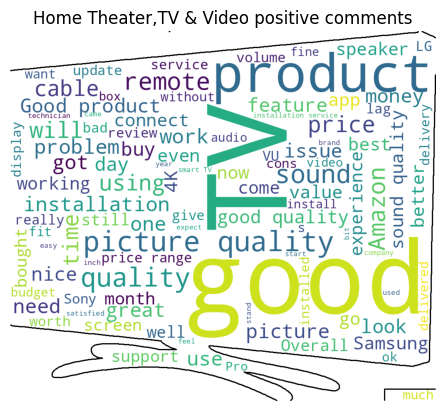

In [44]:
#Wordcloud showing the most relevant words for Home theater - shape TV
plt.title('Home Theater,TV & Video positive comments')
python_mask = np.array(PIL.Image.open('/content/drive/MyDrive/Plotly-dash/th4.webp'))

wc= WordCloud(stopwords=stopwords,
              mask=python_mask,
              background_color='white',
              contour_color='black',
              contour_width=3,
              min_font_size=3,
              max_words=100,
              height=600,
              width=400).generate(text_4)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [45]:
#Save the wordcloud as png file
wc.to_file('wordcloud_output.png')

Computeres and Accessories

In [46]:
df_accessories['subcategory_1'].unique()

array(['Accessories&Peripherals', 'NetworkingDevices',
       'ExternalDevices&DataStorage', 'Printers,Inks&Accessories',
       'Monitors', 'Components', 'Tablets', 'Laptops'], dtype=object)

In [47]:
#Filtering by accessories and peripherals, rating equal or over 4
acc_comments=df_accessories.loc[(df_accessories['subcategory_1']=='Accessories&Peripherals')&(df_accessories['rating']>=4)]
df_acc_com=acc_comments['review_content']
text_5=' '.join(df_acc_com)
text_5

'Looks durable Charging is fine tooNo complains,Charging is really fast, good product.,Till now satisfied with the quality.,This is a good product . The charging speed is slower than the original iPhone cable,Good quality, would recommend,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/81---F1ZgHL._SY88.jpg,Product had worked well till date and was having no issue.Cable is also sturdy enough...Have asked for replacement and company is doing the same...,Value for money I ordered this cable to connect my phone to Android Auto of car. The cable is really strong and the connection ports are really well made. I already has a Micro USB cable from Ambrane and it\'s still in good shape. I connected my phone to the car using the cable and it got connected well and no issues. I also connected it to the charging port and yes it has Fast Charging support.,It quality is good at this price and the main thing is that i didn\'t ever thought that this cable will be so long it\'s good one an

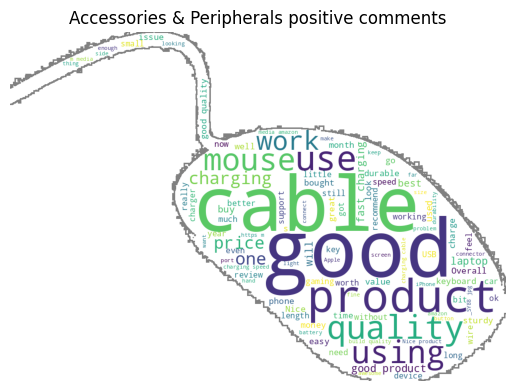

In [48]:
#Wordcloud showing the most relevant words for Home theater - shape mouse
plt.title('Accessories & Peripherals positive comments')
python_mask = np.array(PIL.Image.open('/content/drive/MyDrive/Plotly-dash/mouse3.jpg'))

wc2= WordCloud(
              stopwords=stopwords,
              mask=python_mask,
              background_color='white',
              contour_color='grey',
              contour_width=4,
              min_font_size=3,
              max_words=100,
              height=600,
              width=400).generate(text_5)
plt.imshow(wc2)
plt.axis('off')
plt.show()

Home and Kitchen

In [49]:
#Extract the comments in home data frame
df_text_home=df_home['review_content']
df_text_home

617     Quality of adhesive is very good. I used it to...
652     Its worth it,At this price the product is very...
854     Value of Money ...,Amazing apsara changed my s...
887     https://m.media-amazon.com/images/I/715D5RP3RI...
895     Nice combination for color sketches,It glides ...
                              ...                        
1460    I received product without spanner,Excellent p...
1461    ok,got everything as mentioned but the measuri...
1462    plastic but cool body ,u have to find sturdy s...
1463    I have installed this in my kitchen working fi...
1464    It does it job perfectly..only issue is temp c...
Name: review_content, Length: 448, dtype: object

In [50]:
#Join all entries to create a single text
text_home=' '.join(df_text_home)
text_home

'Quality of adhesive is very good. I used it to stick photo canvas on wall and it worked well.,Good kwality,i dont tell this product totally good.but i believe this item 75 % good.,Good product,Holds good on walls but not in wood works .,Sticks well.. Holds fair amount of weight..,Good and usefull,Very nice. Its worth it,At this price the product is very nice. And easy to use for beginners also. Kids love and enjoy while working these wonderful acrylic colors,I ordered these to use for painting wooden ornaments with my 11-year old niece and her friend. I was pleasantly surprised because the price was good for what I received. These are glass jars and full to the top :). We were able to pour out little drops onto paper plate ‚Äúpalettes‚Äù and there is a lot of paint left.  The paint mixed well to make custom colors. This paint would also work well for lots of craft projects including painting art pictures on paper, on rocks, or t-shirts too.,Good product,It\'s quality is very high and 

In [51]:
#what the subcategories in home category are
df_home['subcategory_1'].unique()

array(['CraftMaterials', 'Kitchen&HomeAppliances',
       'Heating,Cooling&AirQuality', 'Kitchen&Dining',
       'HomeStorage&Organization'], dtype=object)

In [52]:
#Filtering by appliances and rating equal or over 4
home_comments=df_home.loc[(df_home['subcategory_1']=='Kitchen&HomeAppliances')&(df_home['rating']>=4)]
df_home_com=home_comments['review_content']
text_6=' '.join(df_home_com)
text_6

'Tried on woolen clothes and it really worked. Really a useful product but only reason I am giving 4 star is because of the short wire length. Wire length should be bit longer else its amazing product.,Easy to useTime takingBut cleans clothes,https://m.media-amazon.com/images/I/81QEgA-FO1L._SY88.jpg,Good for this price range but not sure about durability but product is good,It does it\'s job very well, It gave new life to my clothes. I just have a single complain and that is regarding its dust collector lid or container it is little bit loose because of this sometimes all dust and wool particles spills all around.,Easy to use.. I like this product, all my problems of clothes are solved.,Nice product i really like it easily clean lints üëç but caps was little loose,It\'s a decent product and very easy to handle. Not sure of the durability as it\'s been over a week only. Will update the review after some few months. The lint remover actually removes the lint :). It is not a gimmick but 

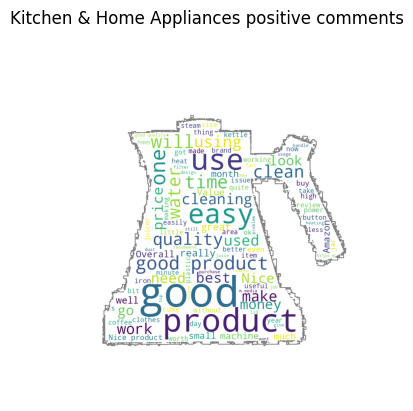

In [53]:
#Wordcloud showing the most relevant words for appliances- shape kettle
plt.title('Kitchen & Home Appliances positive comments')
python_mask = np.array(PIL.Image.open('/content/drive/MyDrive/Plotly-dash/kettle4.jpg'))

wc3= WordCloud(
              stopwords=stopwords,
              mask=python_mask,
              background_color='white',
              contour_color='grey',
              contour_width=4,
              min_font_size=3,
              max_words=100,
              height=600,
              width=400).generate(text_6)
plt.imshow(wc3)
plt.axis('off')
plt.show()